# **Partial Least Squares Regression (PLS)**

https://www.xlstat.com/en/solutions/features/partial-least-squares-regression </br>
https://www.geeksforgeeks.org/partial-least-squares-regression-plsregression-using-sklearn/ </br>
https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#the-data </br>


# **The Partial Least Squares regression (PLS)** *is a method which reduces the variables, used to predict, to a smaller set of predictors. These predictors are then used to perfom a regression.*

*The idea behind the PLS regression is to create, starting from a table with n observations described by p variables, a set of h components with the PLS 1 and PLS 2 algorithms. It finds the directions (latent variables) in the independent variable space, explaining the maximum variance in both dependent and independent variables. It iteratively extracts the latent variables to find the maximum covariance between dependent and independent variables.*

Note: Partial least squares regression (PLS regression) is a statistical technique that shares similarities with principal components regression. Instead of identifying hyperplanes of maximum variance between the response and independent variables, PLS regression constructs a linear regression model by projecting both the predicted and observable variables into a new space. This characteristic of projecting data to new spaces classifies PLS methods as bilinear factor models. Partial least squares discriminant analysis (PLS-DA) is a specific variant used when the response variable (Y) is categorical.

In [1]:
#Import libraries / modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_decomposition import PLSRegression #PLSRegression class for performing PLS regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Diabetes dataset
diabetes = datasets.load_diabetes()

Attributes:
Age,
Sex,
BMI (Body Mass Index),
BP (Average Blood Pressure),
S1 (Total Serum Cholesterol),
S2 (Low-Density Lipoproteins),
S3 (High-Density Lipoproteins),
S4 (Total Cholesterol / HDL Cholesterol ratio),
S5 (log of serum triglycerides level),
S6 (Blood sugar level),
Target Variable: A quantitative measure of disease progression one year after baseline.

The goal of our model is to predict the progression of diabetes based on these input features.

In [3]:
# Extract features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% of the dataset into a training set and 20% into a testing set and the random_state parameter ensures reproducibility

In [5]:
# Initialise PLS model with the desired number of components
n_components = 3
pls_model = PLSRegression(n_components=n_components)
#Here, latent variables should be 3 with the 'n_components' variable and initialised the PLS regression model with the specified number of components

In [6]:
# Fit the model on the training data
pls_model.fit(X_train, y_train)

PLSRegression(n_components=3)

In [7]:
# Predictions on the test set
y_pred = pls_model.predict(X_test)

In [9]:
# Evaluate the model performance
r_squared = pls_model.score(X_test, y_test)
print(f'R-Squared Error: {r_squared}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R-Squared Error: 0.46015344535176705
Mean Squared Error: 2860.188967440198


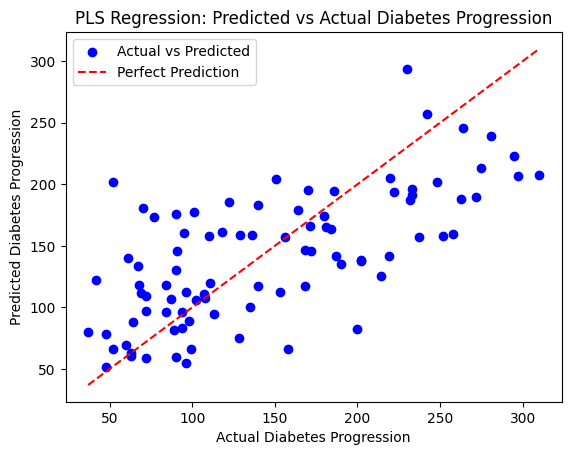

In [10]:
#A Scatter Plot is produced to compare the actual diabetes progression values to the predicted values.
#This visualisation is useful for assessing the model's performance.

# Visualise predicted vs actual values with different colors
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', c='red', label='Perfect Prediction')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('PLS Regression: Predicted vs Actual Diabetes Progression')
plt.legend()
plt.show()

# Interpretation of the Scatter Plot

In this scatter plot, the blue points represent the actual versus predicted diabetes progression values for each data instance. The red dashed line represents a perfect prediction scenario where actual and predicted values are identical. Deviations from this line indicate the model's predictive performance.

Using SHAP to interpret the PLS model

SHAP (SHapley Additive explanations) is used for explaining the output of machine learning models by attributing the model's prediction to each feature in a way that fairly distributes the contribution among the features.

In [11]:
!pip install shap

In [12]:
import shap

# Assuming 'pls_model' is your trained PLS regression model
# Assuming 'X_train' is your training set features
# Assuming 'X_test' is your test set features

  0%|          | 0/89 [00:00<?, ?it/s]

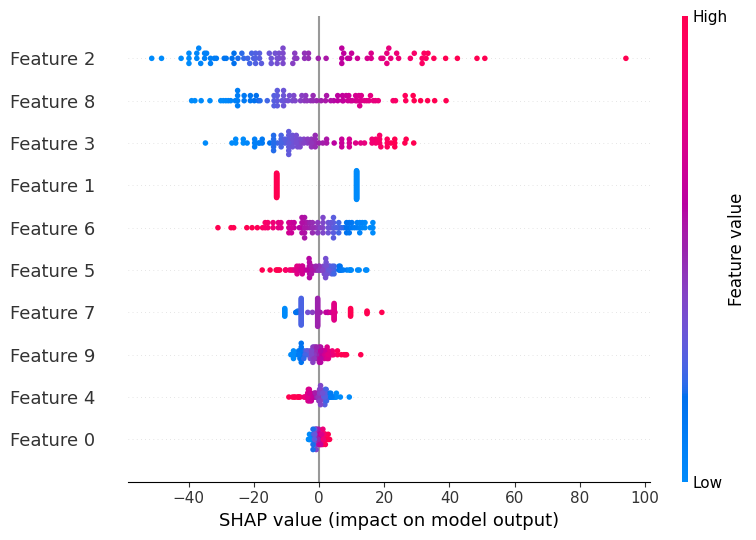

In [13]:
# Create a SHAP explainer for the PLS regression model using KernelExplainer
explainer = shap.KernelExplainer(pls_model.predict, X_train)

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Summary plot for all instances
shap.summary_plot(shap_values, X_test)